In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False
# font_name = font_manager.FontProperties(fname="/System/Library/Fonts/Supplemental/AppleMyungjo.ttf").get_name()

warnings.filterwarnings(action='ignore')

In [3]:
zig_cafe = pd.read_csv('/Users/calmpy/Desktop/2022 2학기 맥북/data_crawling/data/zig_cafe_preprocessing.csv')

In [4]:
print('직방 서울 카페 데이터셋 크기 : ', zig_cafe.shape)

직방 서울 카페 데이터셋 크기 :  (1549, 7)


In [5]:
zig_cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1549 non-null   int64  
 1   보증금액        1549 non-null   int64  
 2   월세금액        1549 non-null   int64  
 3   관리금액        1549 non-null   int64  
 4   권리금         1549 non-null   int64  
 5   층           1549 non-null   int64  
 6   면적          1549 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 84.8 KB


In [6]:
zig_cafe.head()

,Unnamed: 0,보증금액,월세금액,관리금액,권리금,층,면적
0,1,1000,60,3,1500,1,23.14
1,2,5000,175,0,10000,1,19.83
2,4,1000,75,0,2800,1,33.06
3,5,2000,120,5,2000,1,49.59
4,7,5000,300,0,2000,1,109.09


In [7]:
# 컬럼 중 'Unnamed: 0, 매물이름, 설명'삭제
zig_cafe = zig_cafe.drop(['Unnamed: 0'], axis=1)

In [8]:
zig_cafe.head()

,보증금액,월세금액,관리금액,권리금,층,면적
0,1000,60,3,1500,1,23.14
1,5000,175,0,10000,1,19.83
2,1000,75,0,2800,1,33.06
3,2000,120,5,2000,1,49.59
4,5000,300,0,2000,1,109.09


In [9]:
zig_cafe['층'].value_counts()

 1    1354
-1     106
 2      89
Name: 층, dtype: int64

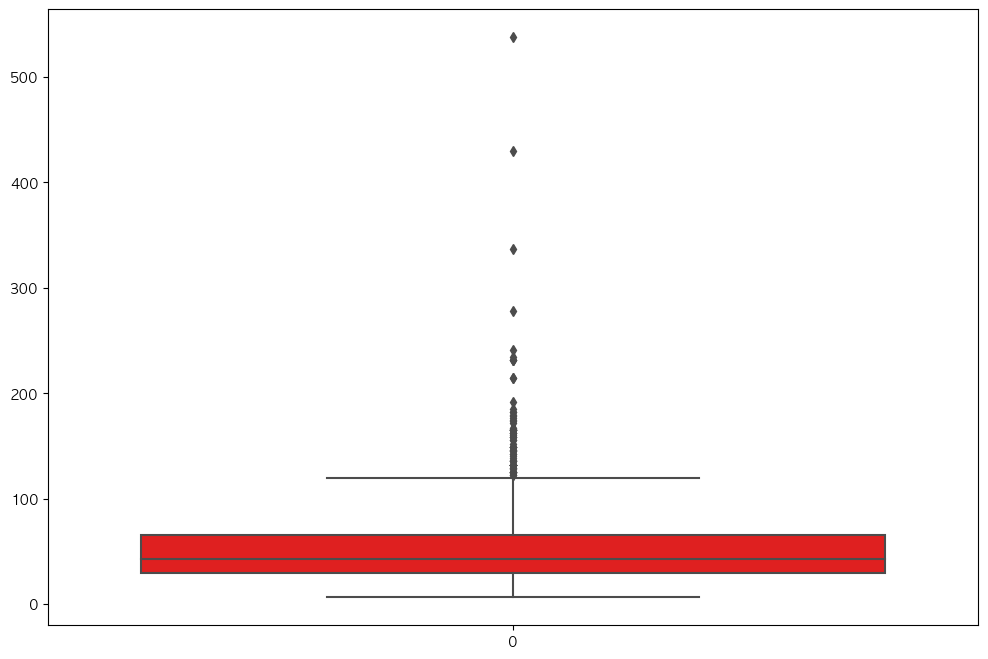

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(data=zig_cafe['면적'], color='red')
plt.show()

In [26]:
# # 전처리한 서울 카페데이터 저장
# zig_cafe.to_csv('/Users/calmpy/Desktop/2022 2학기 맥북/data_crawling/data/zig_cafe_preprocessing2.csv')

In [12]:
# 선형회귀분석 시작

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# X, Y 분할
Y = zig_cafe['면적']
X = zig_cafe.drop(['면적'], axis=1, inplace=False)

In [14]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [15]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [16]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [17]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

In [18]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

In [19]:
print('MSE : {0: .3f}, RMSE : {1: .3f}'.format(mse, rmse))
print('R^2(Variance score) : {0: .3f}'.format(r2_score(Y_test, Y_predict)))

MSE :  1120.447, RMSE :  33.473
R^2(Variance score) :  0.192


In [20]:
print('Y 절편 값: ', np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_, 2))

Y 절편 값:  22.47
회귀 계수 값:  [-0.    0.18 -0.16  0.   -2.42]


In [21]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=X.columns)
coef.sort_values(ascending=False)

월세금액    0.18
보증금액   -0.00
권리금     0.00
관리금액   -0.16
층      -2.42
dtype: float64

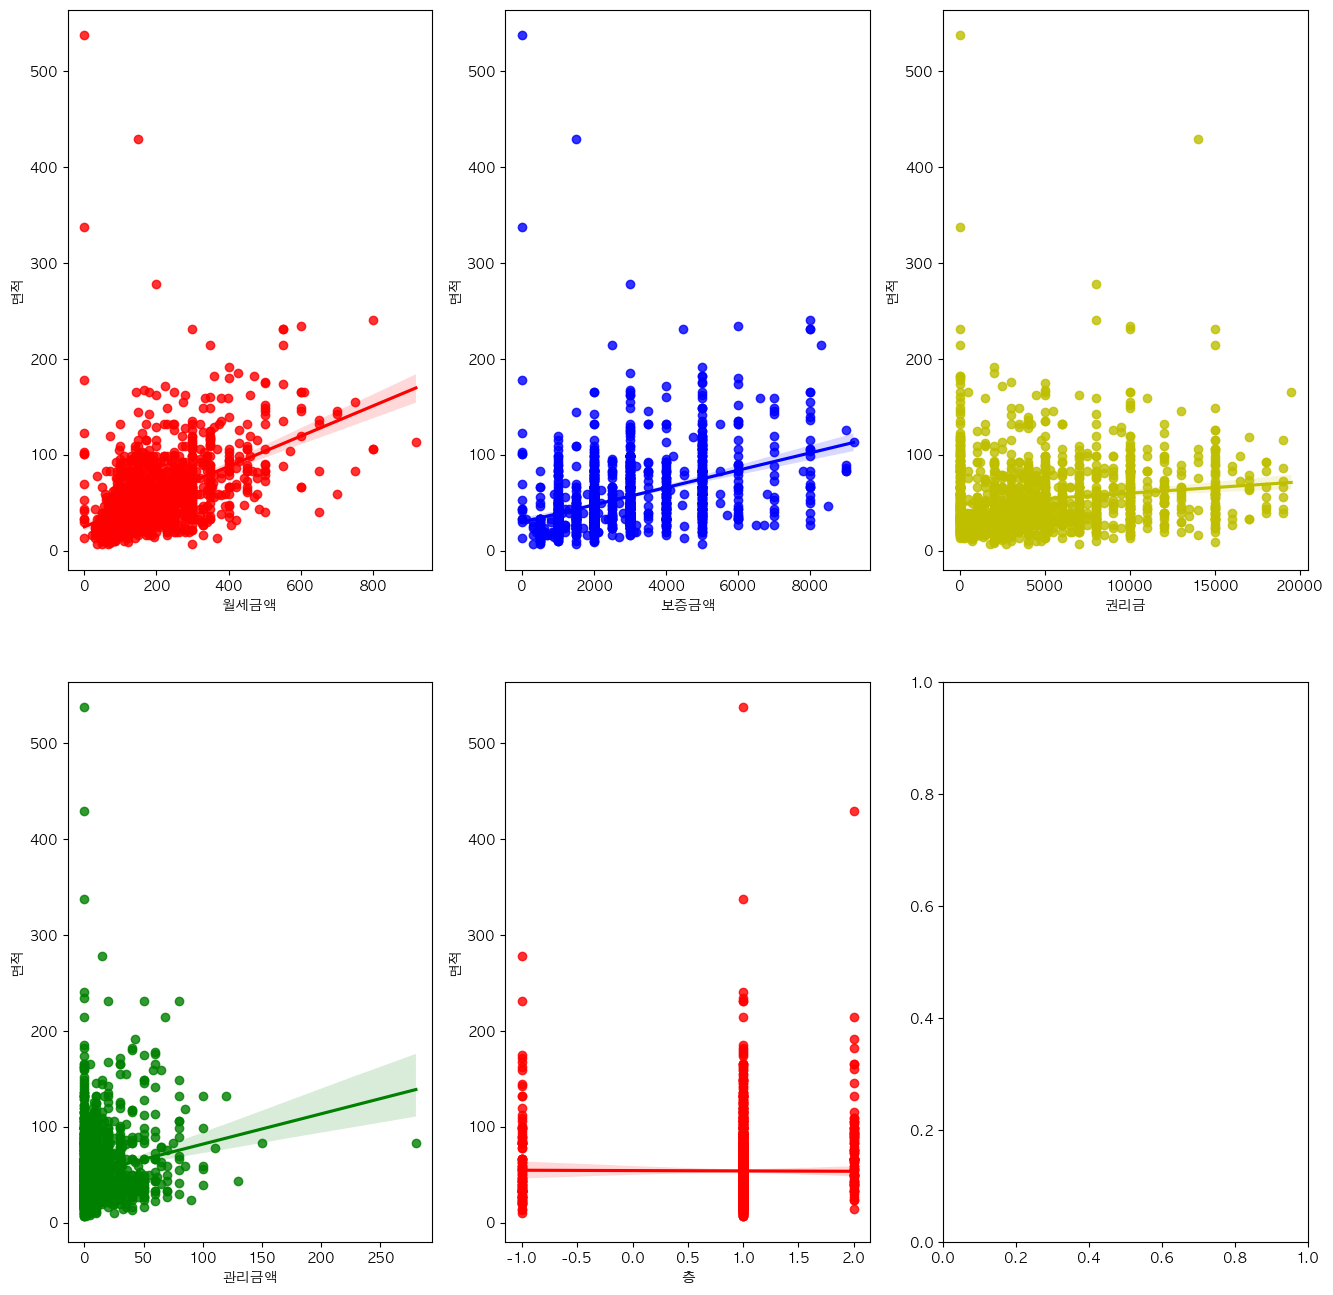

In [22]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=2)

x_features = ['월세금액', '보증금액', '권리금', '관리금액', '층']
plot_color = ['r', 'b', 'y', 'g', 'r']

for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='면적', data=zig_cafe, ax=axs[row][col], color=plot_color[i])

In [30]:
print('원하는 금액을 입력하시면 임대가능한 예상 면적을 알려드립니다. ')

seoul_gu = int(input("월세금액 : "))
monthly_fee = int(input("보증금액: "))
security_deposit = int(input("권리금 : "))
premium_1 = int(input("관리금 : "))
floor_1 = int(input("층 : "))

원하는 금액을 입력하시면 임대가능한 예상 면적을 알려드립니다. 
월세금액 : 100
보증금액: 100
권리금 : 100
관리금 : 10
층 : 1


In [31]:
area_predict = lr.predict([[seoul_gu, monthly_fee, security_deposit, premium_1, floor_1]])

In [32]:
print("입력 금액을 토대로 예상 면적은 %.2f 입니다." %area_predict)

입력 금액을 토대로 예상 면적은 22.24 입니다.
